In [1]:
import os
print(os.getcwd())

/Users/dundun/Desktop/programming group project 2


In [3]:
import pandas as pd
data_file = "ESS10MD_e01.csv"
data_full = pd.read_csv(data_file, low_memory=False)

In [4]:
print(data_full.head())

    idno cntry ess10_reg  regunit nuts1 nuts2 nuts3        name  essround  \
0  10038    BE      BE24        2   BE2  BE24   NaN  ESS10e03_2        10   
1  10053    BE      BE24        2   BE2  BE24   NaN  ESS10e03_2        10   
2  10055    BE      BE33        2   BE3  BE33   NaN  ESS10e03_2        10   
3  10062    BE      BE21        2   BE2  BE21   NaN  ESS10e03_2        10   
4  10064    BE      BE24        2   BE2  BE24   NaN  ESS10e03_2        10   

   edition  ... reg10_drugt_1998  reg10_drugt_1999  reg10_drugt_2000  \
0      3.2  ...              NaN               NaN               NaN   
1      3.2  ...              NaN               NaN               NaN   
2      3.2  ...              NaN               NaN               NaN   
3      3.2  ...              NaN               NaN               NaN   
4      3.2  ...              NaN               NaN               NaN   

   reg10_drugt_2001  reg10_drugt_2002  reg10_drugt_2003  reg10_drugt_2004  \
0               NaN        

In [5]:
print(data_full['nuts2'].unique())

['BE24' 'BE33' 'BE21' 'BE23' 'BE32' 'BE25' 'BE34' 'BE35' 'BE22' 'BE31'
 'BE10' 'BG33' 'BG41' 'BG42' 'BG34' 'BG32' 'BG31' 'CH05' 'CH03' 'CH01'
 'CH06' 'CH02' 'CH04' 'CH07' 'CZ05' 'CZ07' 'CZ04' 'CZ01' 'CZ03' 'CZ08'
 'CZ06' 'CZ02' 'EE00' 'FI1C' 'FI1B' 'FI1D' 'FI19' 'FI20' 'FRI2' 'FRK2'
 'FRG0' 'FRD2' 'FRB0' 'FRD1' 'FRF1' 'FRH0' 'FR10' 'FRJ2' 'FRL0' 'FRK1'
 'FRI1' 'FRC2' 'FRJ1' 'FRI3' 'FRE2' 'FRE1' 'FRC1' 'FRF3' 'FRF2' nan 'EL42'
 'EL43' 'EL52' 'EL30' 'EL63' 'EL41' 'EL61' 'EL64' 'EL51' 'EL54' 'EL65'
 'EL53' 'EL62' 'HR02' 'HR03' 'HR06' 'HR05' 'HU11' 'HU33' 'HU12' 'HU31'
 'HU21' 'HU22' 'HU32' 'HU23' 'IE05' 'IE06' 'IE04' 'IS00' '9999' 'LT02'
 'LT01' 'ME0' 'MK00' 'NL33' 'NL21' 'NL11' 'NL32' 'NL22' 'NL31' 'NL42'
 'NL41' 'NL34' 'NL13' 'NL23' 'NL12' 'NO0A' 'NO08' 'NO02' 'NO06' 'NO09'
 'NO07' 'PT15' 'PT17' 'PT11' 'PT16' 'PT18' 'SI03' 'SI04' 'SK02' 'SK04'
 'SK03' 'SK01']


In [6]:
print(data_full[['c_corruption_2022', 'c_effectiveness_2022', 'c_law_2022', 'c_quality_2022', 'c_stability_2022']].describe())

       c_corruption_2022  c_effectiveness_2022    c_law_2022  c_quality_2022  \
count       37611.000000          37611.000000  37611.000000    37611.000000   
mean            0.836024              0.906407      0.904037        1.003005   
std             0.800363              0.642061      0.648525        0.507258   
min            -0.323431             -0.270800     -0.125401        0.320687   
25%             0.037797              0.447399      0.325585        0.502550   
50%             0.729021              1.001591      1.100806        0.850253   
75%             1.567528              1.343134      1.426389        1.516139   
max             2.246978              2.049949      1.958373        1.779153   

       c_stability_2022  
count      37611.000000  
mean           0.575793  
std            0.319489  
min           -0.059177  
25%            0.334524  
50%            0.635951  
75%            0.815441  
max            1.262935  


In [7]:
print(data_full[['c_corruption_2022', 'c_effectiveness_2022', 'c_law_2022', 'c_quality_2022', 'c_stability_2022']].corr())

                      c_corruption_2022  c_effectiveness_2022  c_law_2022  \
c_corruption_2022              1.000000              0.939672    0.953136   
c_effectiveness_2022           0.939672              1.000000    0.976101   
c_law_2022                     0.953136              0.976101    1.000000   
c_quality_2022                 0.916233              0.894421    0.932348   
c_stability_2022               0.703086              0.810436    0.804725   

                      c_quality_2022  c_stability_2022  
c_corruption_2022           0.916233          0.703086  
c_effectiveness_2022        0.894421          0.810436  
c_law_2022                  0.932348          0.804725  
c_quality_2022              1.000000          0.683266  
c_stability_2022            0.683266          1.000000  


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize CPI score
scaler = StandardScaler()
data_full['CPI_standardized'] = scaler.fit_transform(data_full[['c_ticpi_2022']])

In [9]:
# Calculate correlation with other governance indicators
correlation = data_full[['CPI_standardized', 'c_effectiveness_2022', 'c_corruption_2022']].corr()
print(correlation)

                      CPI_standardized  c_effectiveness_2022  \
CPI_standardized              1.000000              0.928515   
c_effectiveness_2022          0.928515              1.000000   
c_corruption_2022             0.988885              0.939672   

                      c_corruption_2022  
CPI_standardized               0.988885  
c_effectiveness_2022           0.939672  
c_corruption_2022              1.000000  


In [10]:
print(data_full[['ppltrst', 'trstprl']].corr())

          ppltrst   trstprl
ppltrst  1.000000  0.080848
trstprl  0.080848  1.000000


In [11]:
# List of required variables
required_variables = ['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil', 'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl', 'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru', 'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020', 'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020', 'c_effectiveness_2021']

# Check if each required variable exists in the dataset
missing_vars = [var for var in required_variables if var not in data_full.columns]

if missing_vars:
    print("Missing variables:", missing_vars)
else:
    print("All required variables are present in the dataset.")

All required variables are present in the dataset.


In [12]:
# List of required variables to keep
required_variables = [
    'idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil', 
    'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 
    'ppltrst', 'trstprl', 'gndr', 'agea', 'cntry', 'marsts', 
    'chldhhe', 'uemp3m', 'mbtru', 'hinctnta', 
    'c_gini_2022', 'c_effectiveness_2022', 
    'n2_unrao25_2020', 'n2_unrao25_2021', 
    'c_gini_2020', 'c_gini_2021', 
    'c_effectiveness_2020', 'c_effectiveness_2021'
]
# Drop all other variables and rename the dataset to "data_in_progress"
data_in_progress_ess = data_full[required_variables]

# Save the dataset for further cleaning
data_in_progress_ess.to_csv('data_in_progress_ess.csv', index=False)

# Check the renamed dataset
print(data_in_progress_ess.head())

    idno  gincdif nuts2  eisced  eiscedf  eiscedm  domicil  n2_unrao25_2022  \
0  10038        2  BE24       1        4      6.0        4              2.7   
1  10053        3  BE24       7        7      7.0        4              2.7   
2  10055        3  BE33       6        5      5.0        4              7.5   
3  10062        8  BE21       4        1      1.0        1              3.2   
4  10064        2  BE24       7        6      6.0        2              2.7   

   wkhtot  ipeqopt  ...  mbtru  hinctnta  c_gini_2022  c_effectiveness_2022  \
0     666        1  ...      3        88         24.9              1.227659   
1      40        2  ...      3        88         24.9              1.227659   
2      42        1  ...      2         7         24.9              1.227659   
3      35        2  ...      3         7         24.9              1.227659   
4      40        2  ...      1         6         24.9              1.227659   

   n2_unrao25_2020 n2_unrao25_2021  c_gini_2020  c

In [23]:
import pandas as pd

# Load the datasets
data_in_progress_ess = pd.read_csv('data_in_progress_ess.csv')  # The main dataset
eqi_data = pd.read_csv('qog_eqi_agg_21.csv')  # The dataset with EQI variable (additional dataset)

# List unique countries in each dataset
countries_in_data = data_in_progress_ess['cntry'].unique()
countries_in_eqi = eqi_data['nuts0'].unique()

# Find common countries
common_countries = set(countries_in_data).intersection(set(countries_in_eqi))

# Display results
print("Countries in data_in_progress but not in eqi_data:")
print(set(countries_in_data) - set(countries_in_eqi))

print("Countries in eqi_data but not in data_in_progress:")
print(set(countries_in_eqi) - set(countries_in_data))

print("Common countries:")
print(common_countries)

Countries in data_in_progress but not in eqi_data:
{'CH', 'GR', 'NO', 'GB', 'ME', 'MK', 'IS'}
Countries in eqi_data but not in data_in_progress:
{'LV', 'DK', 'EL', 'ES', 'PL', 'LU', 'DE', 'AT', 'MT', 'CY', 'RO', 'SE'}
Common countries:
{'IE', 'IT', 'SK', 'BG', 'NL', 'BE', 'HR', 'PT', 'HU', 'SI', 'CZ', 'EE', 'LT', 'FI', 'FR'}


In [25]:
# Filter data_in_progress for common countries
data_in_progress_ess_filtered = data_in_progress_ess[data_in_progress_ess['cntry'].isin(common_countries)]

# Filter eqi_data for common countries
eqi_data_filtered = eqi_data[eqi_data['nuts0'].isin(common_countries)]

In [27]:
# Check unique nuts2 codes in both datasets
nuts2_data_in_progress_ess = data_in_progress_ess_filtered['nuts2'].unique()
nuts2_eqi_data = eqi_data_filtered['nuts2'].unique()

# Find common nuts2 codes
common_nuts2 = set(nuts2_data_in_progress_ess).intersection(set(nuts2_eqi_data))

# Display results
print("NUTS2 codes in data_in_progress but not in eqi_data:")
print(set(nuts2_data_in_progress_ess) - set(nuts2_eqi_data))

print("NUTS2 codes in eqi_data but not in data_in_progress:")
print(set(nuts2_eqi_data) - set(nuts2_data_in_progress_ess))

NUTS2 codes in data_in_progress but not in eqi_data:
{'HR02', 'HR06', 'EE00', 'HR05'}
NUTS2 codes in eqi_data but not in data_in_progress:
{'ITC1', 'ITH2', 'ITF3', 'ITF4', 'ITF1', 'ITG1', 'HR04', 'PT20', 'ITI1', 'ITF6', 'ITC3', 'FRY1', 'ITF5', 'ITF2', 'ITI3', 'ITI4', 'ITG2', 'ITH1', 'FRM0', 'ITI2', 'ITH5', 'FRY5', 'ITH4', 'ITH3', 'ITC2', 'FRY4', 'FRY2', 'PT30', 'ITC4', 'FRY3'}


In [29]:
# Filter data_in_progress for common NUTS2 codes
data_in_progress_ess_final = data_in_progress_ess_filtered[data_in_progress_ess_filtered['nuts2'].isin(common_nuts2)]

# Filter eqi_data for common NUTS2 codes and select only necessary columns
selected_columns = ['nuts2', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME']
eqi_data_final = eqi_data_filtered[eqi_data_filtered['nuts2'].isin(common_nuts2)][selected_columns]

In [33]:
# Merge the datasets
combined_data = pd.merge(data_in_progress_ess_final, eqi_data_final, on='nuts2', how='inner')

# Display the shape and head of the merged dataset
print(f"The combined dataset has {combined_data.shape[0]} rows and {combined_data.shape[1]} columns.")
print(combined_data.head())

The combined dataset has 24511 rows and 32 columns.
    idno  gincdif nuts2  eisced  eiscedf  eiscedm  domicil  n2_unrao25_2022  \
0  10038        2  BE24       1        4      6.0        4              2.7   
1  10053        3  BE24       7        7      7.0        4              2.7   
2  10055        3  BE33       6        5      5.0        4              7.5   
3  10062        8  BE21       4        1      1.0        1              3.2   
4  10064        2  BE24       7        6      6.0        2              2.7   

   wkhtot  ipeqopt  ...  c_effectiveness_2022  n2_unrao25_2020  \
0     666        1  ...              1.227659              3.1   
1      40        2  ...              1.227659              3.1   
2      42        1  ...              1.227659              6.8   
3      35        2  ...              1.227659              3.5   
4      40        2  ...              1.227659              3.1   

   n2_unrao25_2021  c_gini_2020  c_gini_2021 c_effectiveness_2020  \
0      

In [35]:
# Save the combined dataset to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [37]:
# 'cntry' is the column representing countries in the dataset
num_countries = combined_data['cntry'].nunique()

# Display the number of unique countries
print(f"The dataset contains {num_countries} unique countries.")

# List all the unique country names
unique_countries = combined_data['cntry'].unique()
print("List of unique countries in the dataset:")
print(unique_countries)

The dataset contains 14 unique countries.
List of unique countries in the dataset:
['BE' 'BG' 'CZ' 'FI' 'FR' 'HR' 'HU' 'IE' 'IT' 'LT' 'NL' 'PT' 'SI' 'SK']


In [268]:
print(type(model_spec1_interaction))
print(model_spec1_interaction)

<class 'tuple'>
(DecisionTreeClassifier(max_depth=5, random_state=42), Index(['educ_mob_avg', 'agea', 'age_squared', 'gender', 'resp_ed',
       'income_decile', 'child_ever', 'marital_status', 'unemp_ever',
       'union_member', 'domicile', 'unemp_nuts2', 'EQI', 'wkhtot',
       'educ_mob_avg_EQI', 'educ_mob_avg_income_decile',
       'educ_mob_avg_unemp_nuts2', 'educ_mob_avg_wkhtot',
       'educ_mob_categ_domicile'],
      dtype='object'))


In [270]:
model_spec1_interaction, _ = train_decision_tree(
    combined_data, spec1_predictors, "Specification 1 with Interactions"
)



--- Running Decision Tree (Spec: Specification 1 with Interactions) ---
              precision    recall  f1-score   support

           1       0.76      0.98      0.86      4413
           2       0.19      0.00      0.01       837
           3       0.44      0.15      0.22       640

    accuracy                           0.75      5890
   macro avg       0.46      0.38      0.36      5890
weighted avg       0.65      0.75      0.67      5890



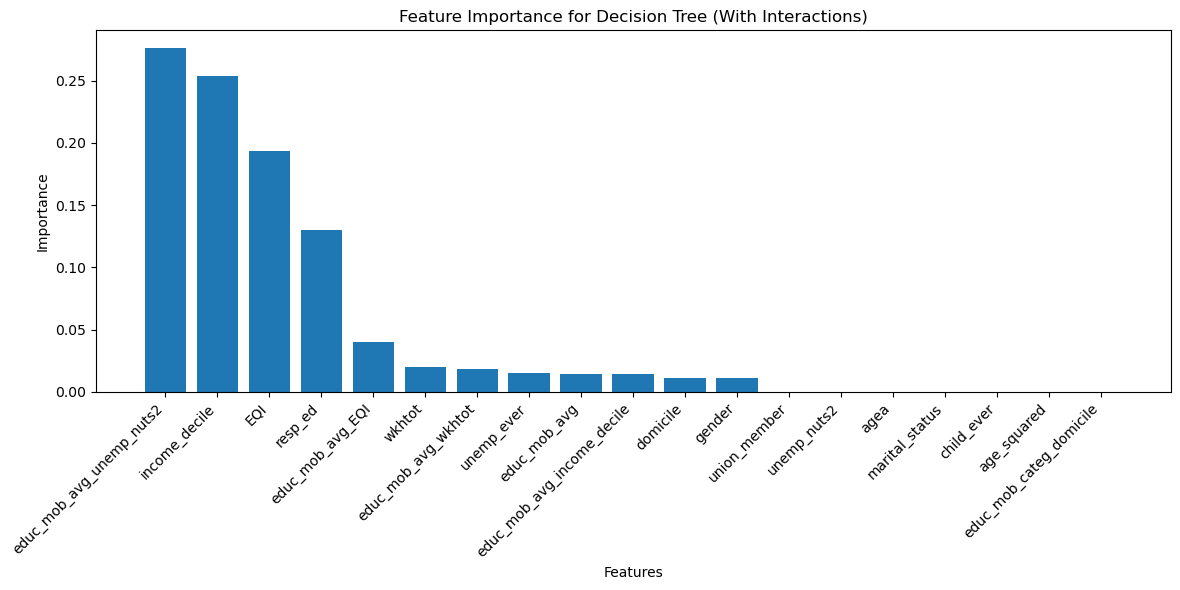

In [272]:
# Retrieve feature importance from the trained decision tree model
feature_importances = model_spec1_interaction.feature_importances_

# Create a dataframe for the feature importance
features = spec1_predictors  # Use the list of predictors including interactions
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Decision Tree (With Interactions)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3372968244.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3372968244.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a


--- Running Random Forest (Spec: Specification 1) ---
              precision    recall  f1-score   support

           1       0.76      0.97      0.86      4413
           2       0.22      0.03      0.05       837
           3       0.44      0.12      0.19       640

    accuracy                           0.74      5890
   macro avg       0.47      0.37      0.36      5890
weighted avg       0.65      0.74      0.67      5890


--- Running Random Forest (Spec: Specification 2) ---
              precision    recall  f1-score   support

           1       0.75      0.96      0.84      4413
           2       0.21      0.04      0.06       837
           3       0.14      0.02      0.04       640

    accuracy                           0.73      5890
   macro avg       0.37      0.34      0.32      5890
weighted avg       0.61      0.73      0.65      5890


--- Running Random Forest (Spec: Specification 3) ---
              precision    recall  f1-score   support

           1      

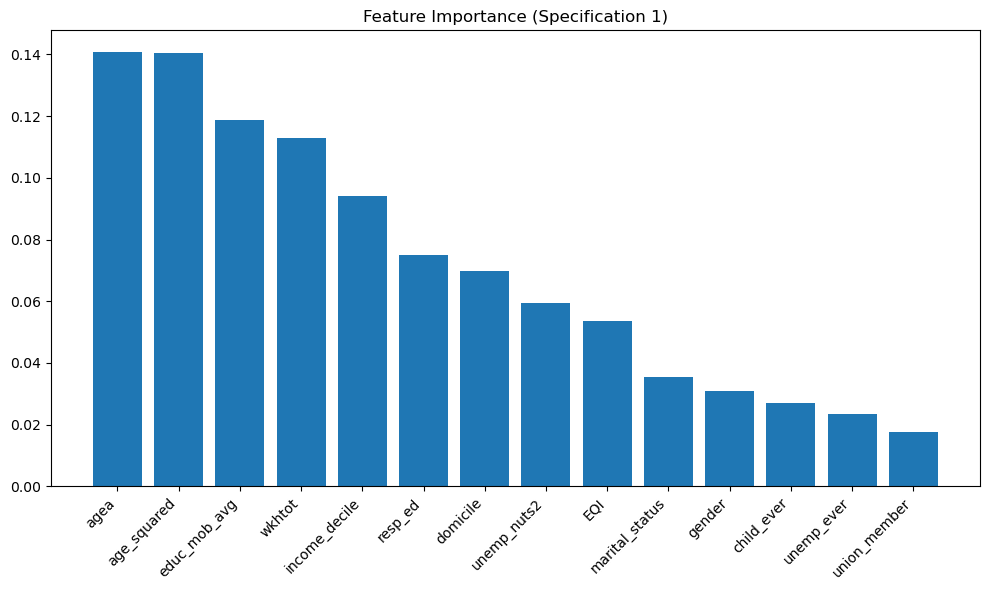

Feature Importance for Specification 2:


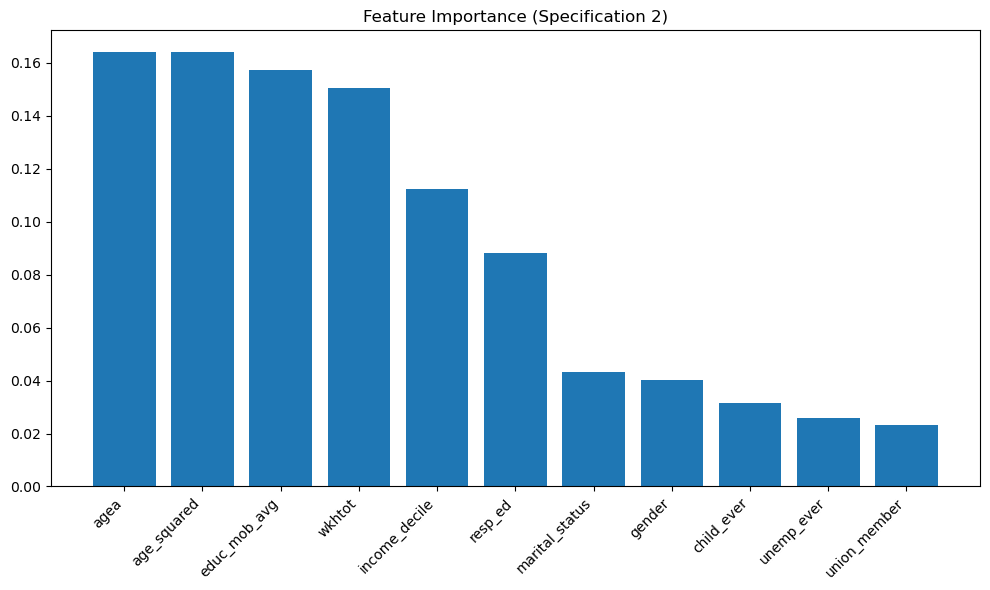

Feature Importance for Specification 3:


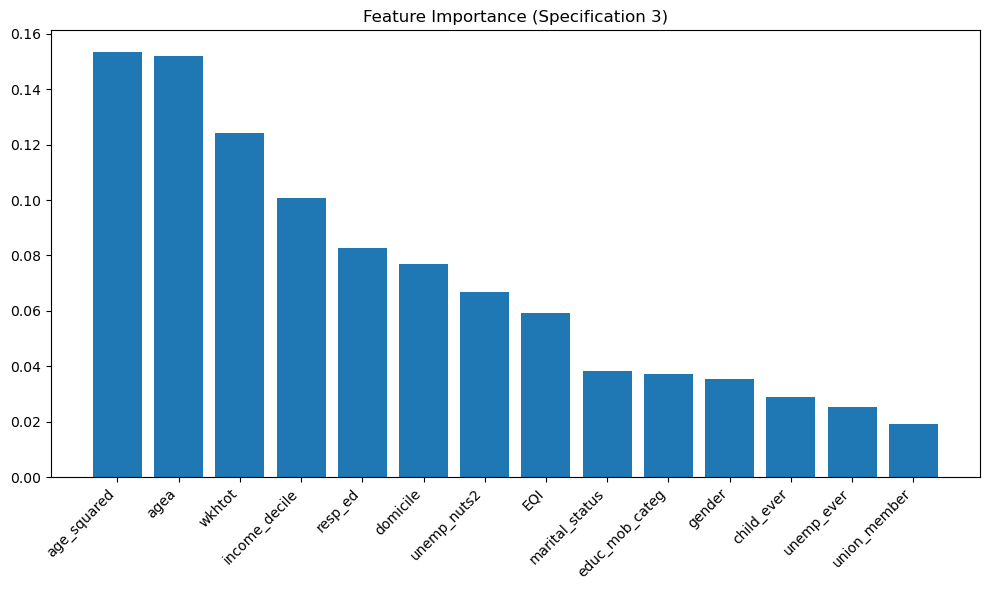

In [363]:
# Random Forests

# ==============================
# Step 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# ==============================
# Step 2: Load the Data
# ==============================
data_path = "cleaned_combined_data_1.csv"  # Replace with your file path
combined_data = pd.read_csv(data_path)

# ==============================
# Step 3: Data Processing
# ==============================
# --- Create Age-Squared Variable ---
combined_data['age_squared'] = combined_data['agea'] ** 2

# --- Transform Country (cntry) Variable ---
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_countries = encoder.fit_transform(combined_data[['cntry']])
encoded_country_df = pd.DataFrame(
    encoded_countries, columns=encoder.get_feature_names_out(['cntry'])
)
combined_data = pd.concat([combined_data.reset_index(drop=True), encoded_country_df], axis=1)
combined_data.drop(columns=['cntry'], inplace=True)

# ==============================
# Step 4: Handle Missing Values
# ==============================
# Drop rows where critical variables are missing
critical_vars = ["educ_mob_categ"]  # Dependent and main predictor
combined_data = combined_data.dropna(subset=critical_vars)

# Impute missing values for secondary variables
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

categorical_vars = ["domicile", "unemp_nuts2", "EQI", "gender", "resp_ed", "income_decile",
    "child_ever", "marital_status", "unemp_ever", "union_member",]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# ==============================
# Step 5: Define Variables
# ==============================
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
main_predictor_cat = ["educ_mob_categ"]
control_vars = ["agea", "age_squared", "gender", "resp_ed", "income_decile",
                "child_ever", "marital_status", "unemp_ever", "union_member"]
regional_factors = ["domicile", "unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]

# ==============================
# Step 6: Define Helper Function for Random Forest
# ==============================
def train_random_forest(data, predictors, spec_name, n_estimators=100, max_depth=None, random_state=42):
    """
    Train and evaluate a Random Forest model.
    """
    print(f"\n--- Running Random Forest (Spec: {spec_name}) ---")
    
    # Drop rows with missing values in predictors
    data = data.dropna(subset=predictors)
    
    # Prepare X and y
    X = data[predictors]
    y = data[dependent_var]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Train Random Forest
    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, random_state=random_state
    )
    model.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    return model, X_train.columns

# ==============================
# Step 7: Run Specifications
# ==============================
# Specification 1: Include all variables
spec1_predictors = main_predictor + control_vars + regional_factors + hours_worked
model_spec1, feature_names_spec1 = train_random_forest(combined_data, spec1_predictors, "Specification 1")

# Specification 2: Main predictor + hours worked + control variables
spec2_predictors = main_predictor + hours_worked + control_vars
model_spec2, feature_names_spec2 = train_random_forest(combined_data, spec2_predictors, "Specification 2")

# Specification 3: Categorical main predictor + all other variables
spec3_predictors = main_predictor_cat + control_vars + regional_factors + hours_worked
model_spec3, feature_names_spec3 = train_random_forest(combined_data, spec3_predictors, "Specification 3")

# ==============================
# Step 8: Feature Importance
# ==============================
def plot_feature_importance(model, feature_names, spec_name):
    """
    Plot the feature importance for a Random Forest model.
    """
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[sorted_idx], align="center")
    plt.xticks(range(len(importance)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
    plt.title(f"Feature Importance ({spec_name})")
    plt.tight_layout()
    plt.show()

# ==============================
# Step 9: Plot Feature Importance for All Specifications
# ==============================
# Dictionary to map models to their feature names and specifications
models_specifications = {
    "Specification 1": (model_spec1, feature_names_spec1),
    "Specification 2": (model_spec2, feature_names_spec2),
    "Specification 3": (model_spec3, feature_names_spec3),
}

# Plot feature importance for each specification
for spec_name, (model, feature_names) in models_specifications.items():
    print(f"Feature Importance for {spec_name}:")
    plot_feature_importance(model, feature_names, spec_name)



--- Running Random Forest (Spec: Specification 4) ---
              precision    recall  f1-score   support

           1       0.76      0.98      0.85      4281
           2       0.31      0.03      0.06       852
           3       0.43      0.09      0.15       630

    accuracy                           0.74      5763
   macro avg       0.50      0.37      0.35      5763
weighted avg       0.65      0.74      0.66      5763



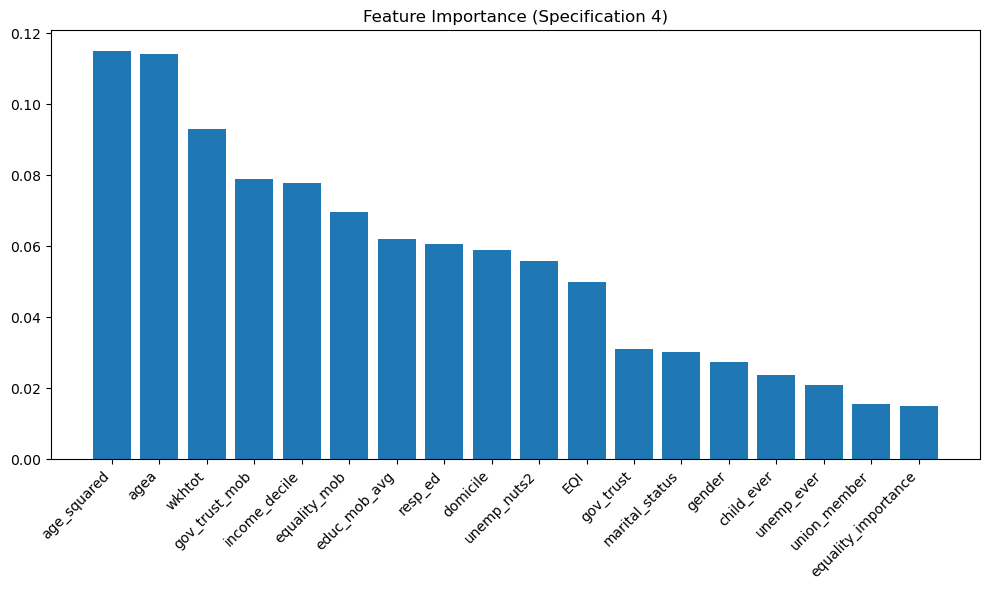

In [365]:
# ==============================
# Step 9: Add Social Attitudes Variables
# ==============================
# Define social attitudes variables
social_attitudes = ["gov_trust", "equality_importance"]

# Add interaction terms for social attitudes and mobility
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']

# Combine social attitudes and interaction terms
interaction_terms = ["gov_trust_mob", "equality_mob"]

# ==============================
# Step 10: Run Specification with Social Attitudes
# ==============================
# Specification 4: Social attitudes + mobility interaction
spec4_predictors = (
    main_predictor 
    + control_vars 
    + regional_factors 
    + hours_worked 
    + social_attitudes 
    + interaction_terms
)
model_spec4, feature_names_spec4 = train_random_forest(combined_data, spec4_predictors, "Specification 4")

# ==============================
# Step 11: Plot Feature Importance for Specification 4
# ==============================
# Plot feature importance for Specification 4
plot_feature_importance(model_spec4, feature_names_spec4, "Specification 4")

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/1131614344.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/1131614344.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a


--- Running Random Forest (Spec: RandomForest_Spec1) ---
              precision    recall  f1-score   support

           1       0.76      0.97      0.86      4413
           2       0.22      0.03      0.05       837
           3       0.44      0.12      0.19       640

    accuracy                           0.74      5890
   macro avg       0.47      0.37      0.36      5890
weighted avg       0.65      0.74      0.67      5890


--- Running Random Forest (Spec: RandomForest_Spec2) ---
              precision    recall  f1-score   support

           1       0.75      0.96      0.84      4413
           2       0.21      0.04      0.06       837
           3       0.14      0.02      0.04       640

    accuracy                           0.73      5890
   macro avg       0.37      0.34      0.32      5890
weighted avg       0.61      0.73      0.65      5890


--- Running Random Forest (Spec: RandomForest_Spec3) ---
              precision    recall  f1-score   support

         

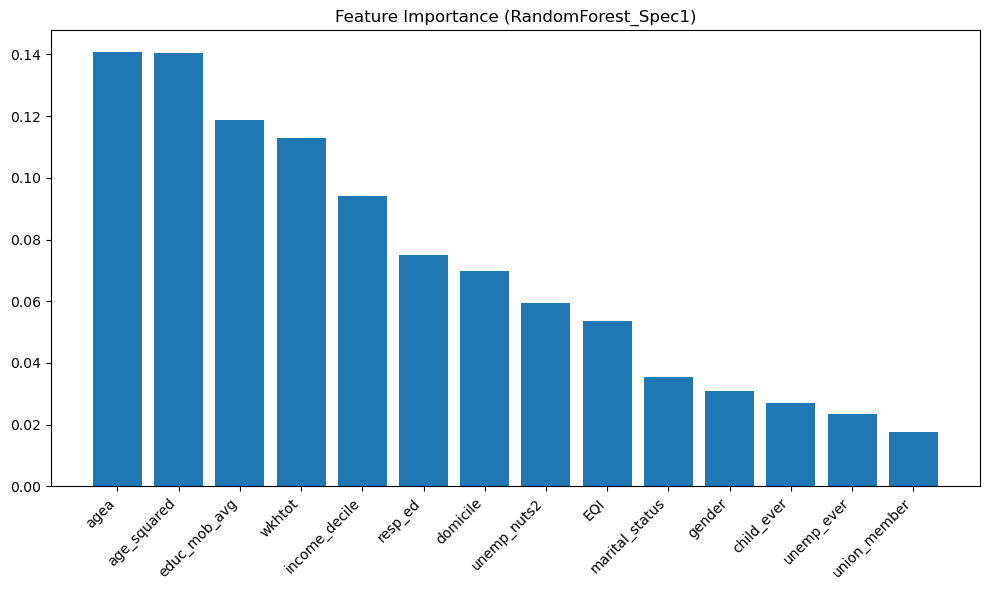

Feature Importance for RandomForest_Spec2:


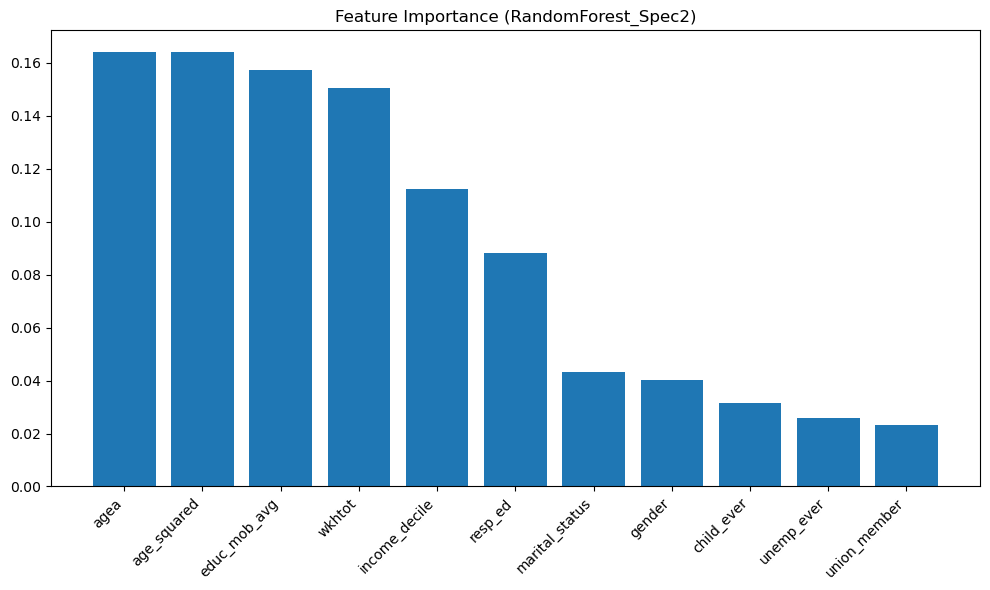

Feature Importance for RandomForest_Spec3:


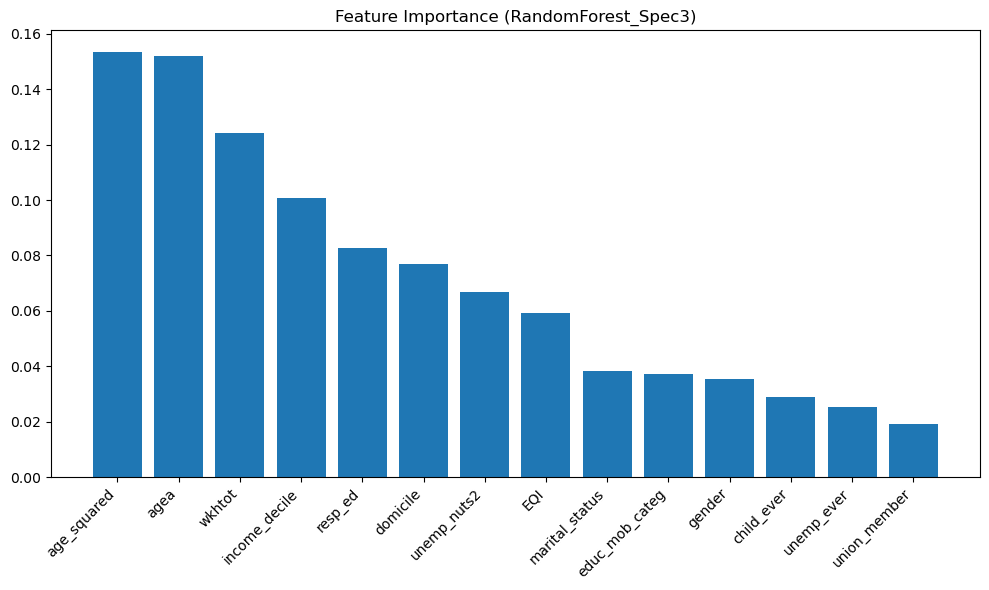


--- Running Random Forest (Spec: RandomForest_Spec4) ---


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/1131614344.py:149: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['gov_trust'].fillna(combined_data['gov_trust'].mode()[0], inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/1131614344.py:150: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

              precision    recall  f1-score   support

           1       0.76      0.98      0.86      4413
           2       0.25      0.04      0.06       837
           3       0.46      0.10      0.16       640

    accuracy                           0.75      5890
   macro avg       0.49      0.37      0.36      5890
weighted avg       0.66      0.75      0.67      5890



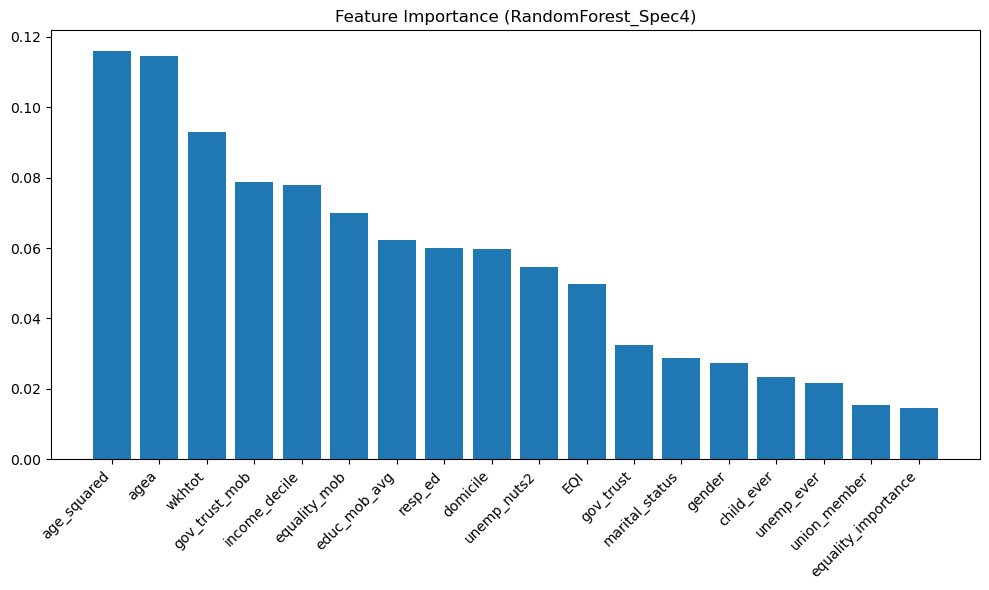

In [393]:
# Random Forests

# ==============================
# Step 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# ==============================
# Step 2: Load the Data
# ==============================
data_path = "cleaned_combined_data_1.csv"  # Replace with your file path
combined_data = pd.read_csv(data_path)

# ==============================
# Step 3: Data Processing
# ==============================
# --- Create Age-Squared Variable ---
combined_data['age_squared'] = combined_data['agea'] ** 2

# --- Transform Country (cntry) Variable ---
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_countries = encoder.fit_transform(combined_data[['cntry']])
encoded_country_df = pd.DataFrame(
    encoded_countries, columns=encoder.get_feature_names_out(['cntry'])
)
combined_data = pd.concat([combined_data.reset_index(drop=True), encoded_country_df], axis=1)
combined_data.drop(columns=['cntry'], inplace=True)

# ==============================
# Step 4: Handle Missing Values
# ==============================
# Drop rows where critical variables are missing
critical_vars = ["educ_mob_categ"]  # Dependent and main predictor
combined_data = combined_data.dropna(subset=critical_vars)

# Impute missing values for secondary variables
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

categorical_vars = ["domicile", "unemp_nuts2", "EQI", "gender", "resp_ed", "income_decile",
    "child_ever", "marital_status", "unemp_ever", "union_member",]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# ==============================
# Step 5: Define Variables
# ==============================
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
main_predictor_cat = ["educ_mob_categ"]
control_vars = ["agea", "age_squared", "gender", "resp_ed", "income_decile",
                "child_ever", "marital_status", "unemp_ever", "union_member"]
regional_factors = ["domicile", "unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]

# ==============================
# Step 6: Define Helper Function for Random Forest
# ==============================
def train_random_forest(data, predictors, spec_name, n_estimators=100, max_depth=None, random_state=42):
    """
    Train and evaluate a Random Forest model.
    """
    print(f"\n--- Running Random Forest (Spec: {spec_name}) ---")
    
    # Drop rows with missing values in predictors
    data = data.dropna(subset=predictors)
    
    # Prepare X and y
    X = data[predictors]
    y = data[dependent_var]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Train Random Forest
    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, random_state=random_state
    )
    model.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    return model, X_train.columns

# ==============================
# Step 7: Run Specifications
# ==============================
# Specification 1: Include all variables
spec1_predictors_rf = main_predictor + control_vars + regional_factors + hours_worked
model_spec1_rf, feature_names_spec1_rf = train_random_forest(combined_data, spec1_predictors_rf, "RandomForest_Spec1")

# Specification 2: Main predictor + hours worked + control variables
spec2_predictors_rf = main_predictor + hours_worked + control_vars
model_spec2_rf, feature_names_spec2_rf = train_random_forest(combined_data, spec2_predictors_rf, "RandomForest_Spec2")

# Specification 3: Categorical main predictor + all other variables
spec3_predictors_rf = main_predictor_cat + control_vars + regional_factors + hours_worked
model_spec3_rf, feature_names_spec3_rf = train_random_forest(combined_data, spec3_predictors_rf, "RandomForest_Spec3")

# ==============================
# Step 8: Feature Importance
# ==============================
def plot_feature_importance(model, feature_names, spec_name):
    """
    Plot the feature importance for a Random Forest model.
    """
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[sorted_idx], align="center")
    plt.xticks(range(len(importance)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
    plt.title(f"Feature Importance ({spec_name})")
    plt.tight_layout()
    plt.show()

# ==============================
# Step 9: Plot Feature Importance for All Specifications
# ==============================
# Dictionary to map models to their feature names and specifications
models_specifications_rf = {
    "RandomForest_Spec1": (model_spec1_rf, feature_names_spec1_rf),
    "RandomForest_Spec2": (model_spec2_rf, feature_names_spec2_rf),
    "RandomForest_Spec3": (model_spec3_rf, feature_names_spec3_rf),
}

# Plot feature importance for each specification
for spec_name, (model, feature_names) in models_specifications_rf.items():
    print(f"Feature Importance for {spec_name}:")
    plot_feature_importance(model, feature_names, spec_name)

# ==============================
# Step 10: Add Social Attitudes Variables
# ==============================
# Add interaction terms for social attitudes and mobility
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']

# Handle missing values for social attitudes
# Fill missing values for gov_trust and equality_importance with their respective modes
combined_data['gov_trust'].fillna(combined_data['gov_trust'].mode()[0], inplace=True)
combined_data['equality_importance'].fillna(combined_data['equality_importance'].mode()[0], inplace=True)

# Recalculate interaction terms after filling missing values
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']

# Handle missing values for interaction terms
# Option 1: Fill NaN in interaction terms with 0 (if missing means no interaction effect)
combined_data['gov_trust_mob'].fillna(0, inplace=True)
combined_data['equality_mob'].fillna(0, inplace=True)

# Define Variables (Social Attitudes)
social_attitudes = ["gov_trust", "equality_importance"]
interaction_terms = ["gov_trust_mob", "equality_mob"]
# ==============================
# Step 11: Run Specification with Social Attitudes
# ==============================
# Specification 4: Social attitudes + mobility interaction
spec4_predictors_rf = (
    main_predictor 
    + control_vars 
    + regional_factors 
    + hours_worked 
    + social_attitudes 
    + interaction_terms
)
model_spec4_rf, feature_names_spec4_rf = train_random_forest(combined_data, spec4_predictors_rf, "RandomForest_Spec4")

# ==============================
# Step 12: Plot Feature Importance for Specification 4
# ==============================
# Plot feature importance for Specification 4
plot_feature_importance(model_spec4_rf, feature_names_spec4_rf, "RandomForest_Spec4")


Variance of Predictors:
educ_mob_avg       2.725046
agea             255.317508
resp_ed            3.309985
income_decile      6.343231
domicile           1.459716
unemp_nuts2        0.864551
EQI                1.252187
wkhtot           193.952568
dtype: float64


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3074765659.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3074765659.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

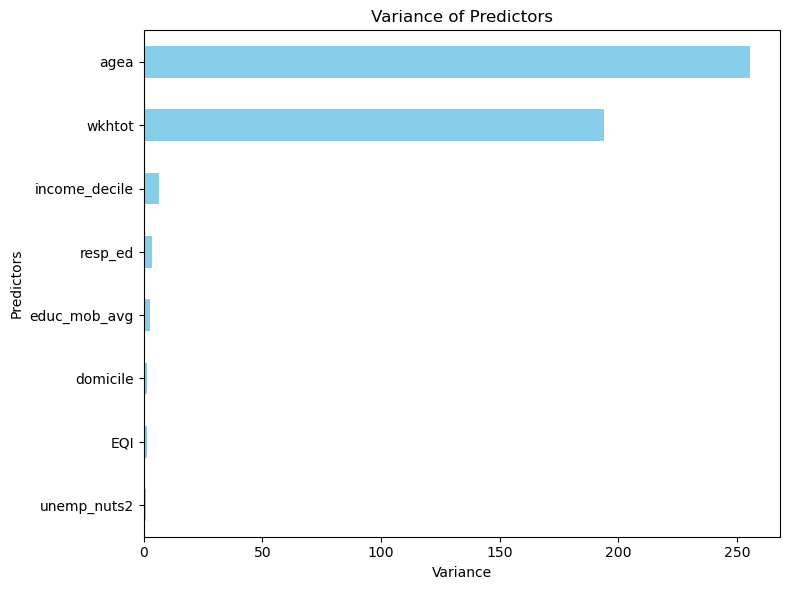


Correlation with `inc_redist`:
inc_redist       1.000000
income_decile    0.144734
resp_ed          0.137826
EQI              0.071644
wkhtot           0.036658
educ_mob_avg    -0.007086
domicile        -0.021315
agea            -0.065593
unemp_nuts2     -0.118192
Name: inc_redist, dtype: float64


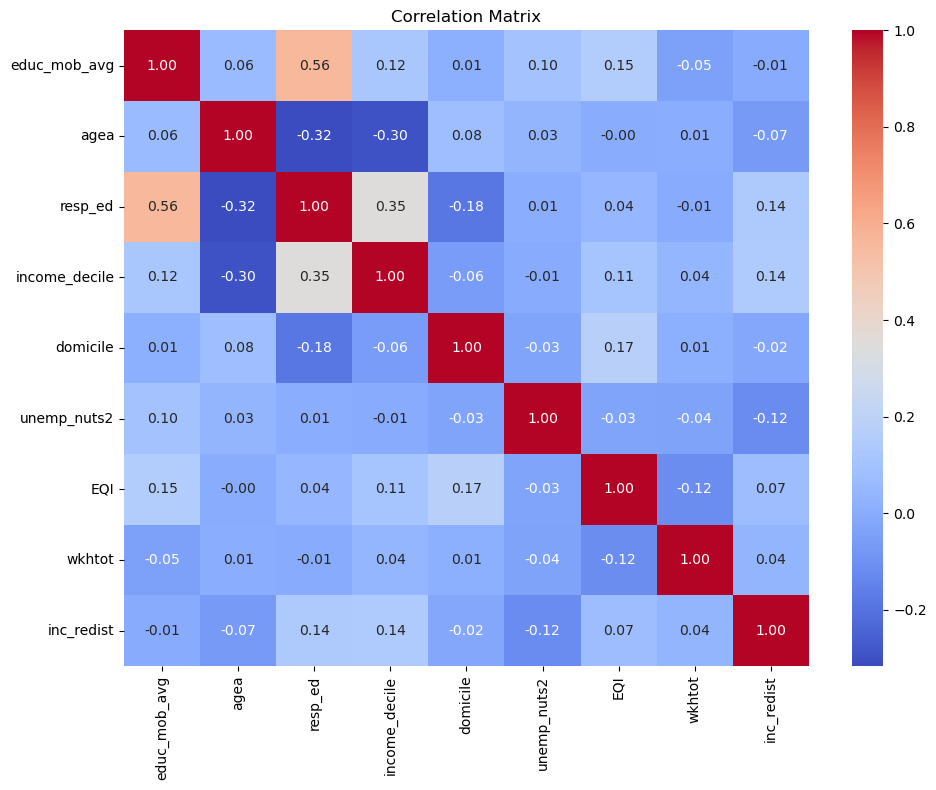

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3074765659.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, y="Predictor", x="Standardized Coefficient", palette="viridis")



Standardized Coefficients:
       Predictor  Standardized Coefficient
2        resp_ed                  0.178719
3  income_decile                  0.095933
6            EQI                  0.072287
7         wkhtot                  0.032977
1           agea                  0.030690
4       domicile                  0.000017
5    unemp_nuts2                 -0.104758
0   educ_mob_avg                 -0.119494


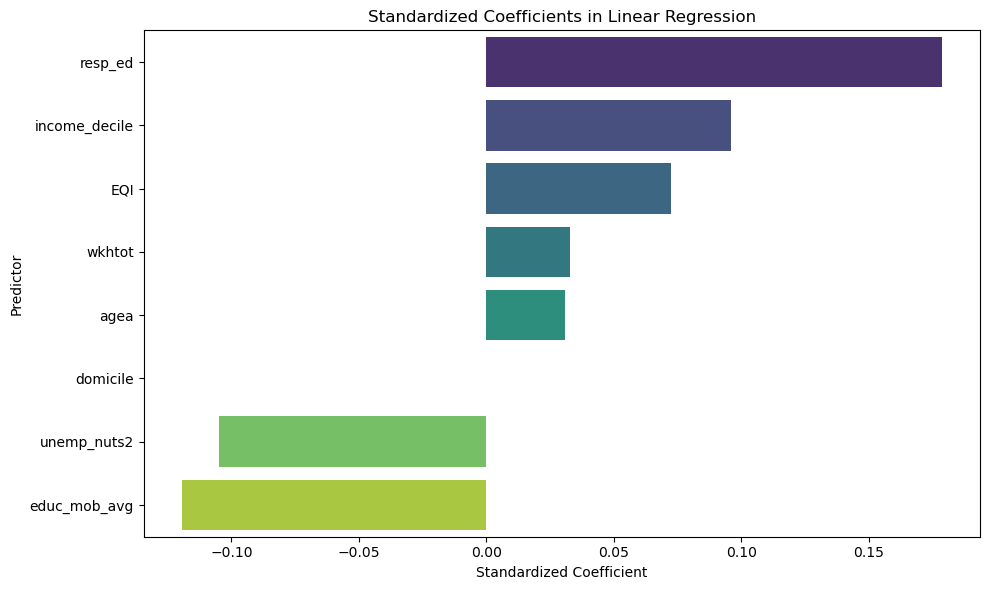

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ==============================
# Step 1: Load the Data
# ==============================
data_path = "cleaned_combined_data_1.csv"  # Replace with your file path
combined_data = pd.read_csv(data_path)

# Define predictors
main_predictor = ["educ_mob_avg"]
control_vars = ["agea", "resp_ed", "income_decile"]
regional_factors = ["domicile", "unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]

# Combine all predictors for testing
predictors = main_predictor + control_vars + regional_factors + hours_worked

# ==============================
# Step 2: Handle Missing Values
# ==============================
# Drop rows where critical variables are missing (e.g., dependent variable or main predictor)
critical_vars = ["inc_redist"] + main_predictor
combined_data = combined_data.dropna(subset=critical_vars)

# Impute missing values for continuous variables
continuous_vars = ["agea", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

# Impute missing values for categorical variables
categorical_vars = ["domicile", "unemp_nuts2", "EQI", "resp_ed", "income_decile"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# ==============================
# Step 3: Variance of Predictors
# ==============================
# Ensure predictors are properly handled
X = combined_data[predictors]

# Calculate variance for all predictors
variances = X.var()

# Display variances
print("Variance of Predictors:")
print(variances)

# Plot variances for comparison
plt.figure(figsize=(8, 6))
variances.sort_values().plot(kind="barh", color="skyblue")
plt.title("Variance of Predictors")
plt.xlabel("Variance")
plt.ylabel("Predictors")
plt.tight_layout()
plt.show()

# ==============================
# Step 4: Correlation Analysis
# ==============================
# Compute correlations with the dependent variable
correlations = combined_data[predictors + ["inc_redist"]].corr()["inc_redist"].sort_values(ascending=False)

print("\nCorrelation with `inc_redist`:")
print(correlations)

# Heatmap for visual correlation
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data[predictors + ["inc_redist"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# ==============================
# Step 5: Standardized Coefficients in Linear Regression
# ==============================
# Prepare data
X = combined_data[predictors]
y = combined_data["inc_redist"]

# Standardize features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_scaled, y_scaled)

# Get standardized coefficients
coef_df = pd.DataFrame({
    "Predictor": X.columns,
    "Standardized Coefficient": linear_model.coef_.flatten()
}).sort_values(by="Standardized Coefficient", ascending=False)

print("\nStandardized Coefficients:")
print(coef_df)

# Plot standardized coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, y="Predictor", x="Standardized Coefficient", palette="viridis")
plt.title("Standardized Coefficients in Linear Regression")
plt.tight_layout()
plt.show()


Overall Feature Importance Ranking:
               Variable  DecisionTree_Spec1_Importance  \
12        income_decile                       0.250902   
16          unemp_nuts2                       0.269310   
0                   EQI                       0.231975   
14              resp_ed                       0.115382   
5          educ_mob_avg                       0.036399   
18               wkhtot                       0.031717   
2                  agea                       0.010016   
1           age_squared                       0.008204   
7   equality_importance                            NaN   
11        gov_trust_mob                            NaN   
4              domicile                       0.008255   
8          equality_mob                            NaN   
15           unemp_ever                       0.026727   
10            gov_trust                            NaN   
9                gender                       0.011112   
13       marital_status             

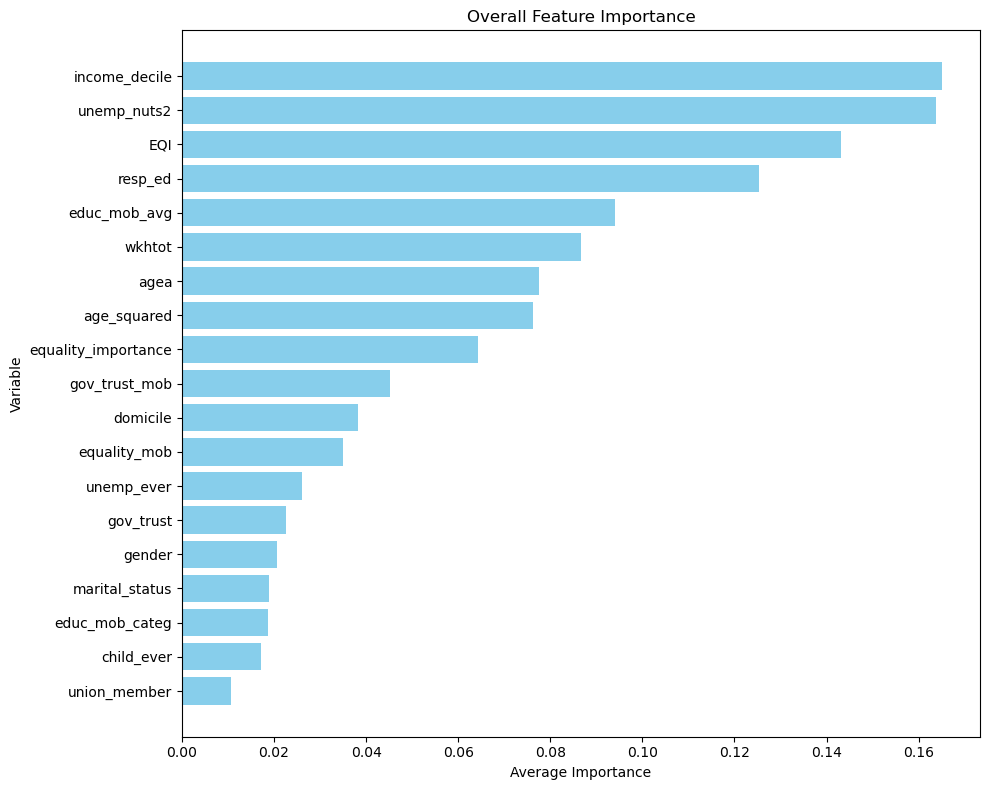

In [397]:
# ==============================
# Step 1: Extract Feature Importance
# ==============================
def get_feature_importance(model, feature_names, spec_name):
    """
    Extract feature importances from a model and return as a DataFrame.
    """
    importance = model.feature_importances_
    importance_df = pd.DataFrame({
        "Variable": feature_names,
        f"{spec_name}_Importance": importance
    })
    return importance_df

# Extract feature importance for Decision Tree specifications
importance_spec1_dt = get_feature_importance(model_spec1_dt, feature_names_spec1_dt, "DecisionTree_Spec1")
importance_spec2_dt = get_feature_importance(model_spec2_dt, feature_names_spec2_dt, "DecisionTree_Spec2")
importance_spec3_dt = get_feature_importance(model_spec3_dt, feature_names_spec3_dt, "DecisionTree_Spec3")
importance_spec4_dt = get_feature_importance(model_spec4_dt, feature_names_spec4_dt, "DecisionTree_Spec4")

# Extract feature importance for Random Forest specifications
importance_spec1_rf = get_feature_importance(model_spec1_rf, feature_names_spec1_rf, "RandomForest_Spec1")
importance_spec2_rf = get_feature_importance(model_spec2_rf, feature_names_spec2_rf, "RandomForest_Spec2")
importance_spec3_rf = get_feature_importance(model_spec3_rf, feature_names_spec3_rf, "RandomForest_Spec3")
importance_spec4_rf = get_feature_importance(model_spec4_rf, feature_names_spec4_rf, "RandomForest_Spec4")

# ==============================
# Step 2: Normalize Feature Importance
# ==============================
def normalize_importance(df, spec_name):
    """
    Normalize feature importances to sum to 1.
    """
    total_importance = df[f"{spec_name}_Importance"].sum()
    df[f"{spec_name}_Importance"] = df[f"{spec_name}_Importance"] / total_importance
    return df

# Normalize feature importance for all specifications
importance_spec1_dt = normalize_importance(importance_spec1_dt, "DecisionTree_Spec1")
importance_spec2_dt = normalize_importance(importance_spec2_dt, "DecisionTree_Spec2")
importance_spec3_dt = normalize_importance(importance_spec3_dt, "DecisionTree_Spec3")
importance_spec4_dt = normalize_importance(importance_spec4_dt, "DecisionTree_Spec4")

importance_spec1_rf = normalize_importance(importance_spec1_rf, "RandomForest_Spec1")
importance_spec2_rf = normalize_importance(importance_spec2_rf, "RandomForest_Spec2")
importance_spec3_rf = normalize_importance(importance_spec3_rf, "RandomForest_Spec3")
importance_spec4_rf = normalize_importance(importance_spec4_rf, "RandomForest_Spec4")

# ==============================
# Step 3: Aggregate Feature Importance
# ==============================
# Combine all feature importance data
all_importances = [
    importance_spec1_dt, importance_spec2_dt, importance_spec3_dt, importance_spec4_dt,
    importance_spec1_rf, importance_spec2_rf, importance_spec3_rf, importance_spec4_rf
]

# Merge dataframes on the "Variable" column
overall_importance = pd.concat(all_importances, axis=0).groupby("Variable").mean().reset_index()

# Add average importance across specifications
overall_importance["Average_Importance"] = overall_importance.iloc[:, 1:].mean(axis=1)

# Sort by average importance
overall_importance = overall_importance.sort_values(by="Average_Importance", ascending=False)

# ==============================
# Step 4: Display Rankings
# ==============================
print("Overall Feature Importance Ranking:")
print(overall_importance)

# Plot overall feature importance
plt.figure(figsize=(10, 8))
plt.barh(overall_importance["Variable"], overall_importance["Average_Importance"], color="skyblue")
plt.title("Overall Feature Importance")
plt.xlabel("Average Importance")
plt.ylabel("Variable")
plt.gca().invert_yaxis()  # Invert y-axis to display top features first
plt.tight_layout()
plt.show()


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3550280369.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3550280369.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a


--- Running Multinomial Logistic Regression (Spec: Top_Ten_Variables) ---
              precision    recall  f1-score   support

           1       0.85      0.61      0.71     14610
           2       0.21      0.31      0.25      2920
           3       0.22      0.53      0.32      2102

    accuracy                           0.56     19632
   macro avg       0.43      0.48      0.43     19632
weighted avg       0.69      0.56      0.60     19632


--- Coefficients for Top_Ten_Variables ---

         educ_mob_avg      agea  age_squared   resp_ed  income_decile  \
Class 1      0.024640  0.011081     0.012480 -0.083599      -0.087205   
Class 2     -0.014394  0.005634     0.006976  0.024341       0.014523   
Class 3     -0.010246 -0.016714    -0.019455  0.059258       0.072682   

         cntry_BG  cntry_CZ  cntry_FI  cntry_FR  cntry_HR  ...  cntry_LT  \
Class 1  0.058196 -0.135557 -0.028250  0.000002  0.005567  ...  0.002348   
Class 2 -0.012053  0.004437  0.026610 -0.016168 -0.025

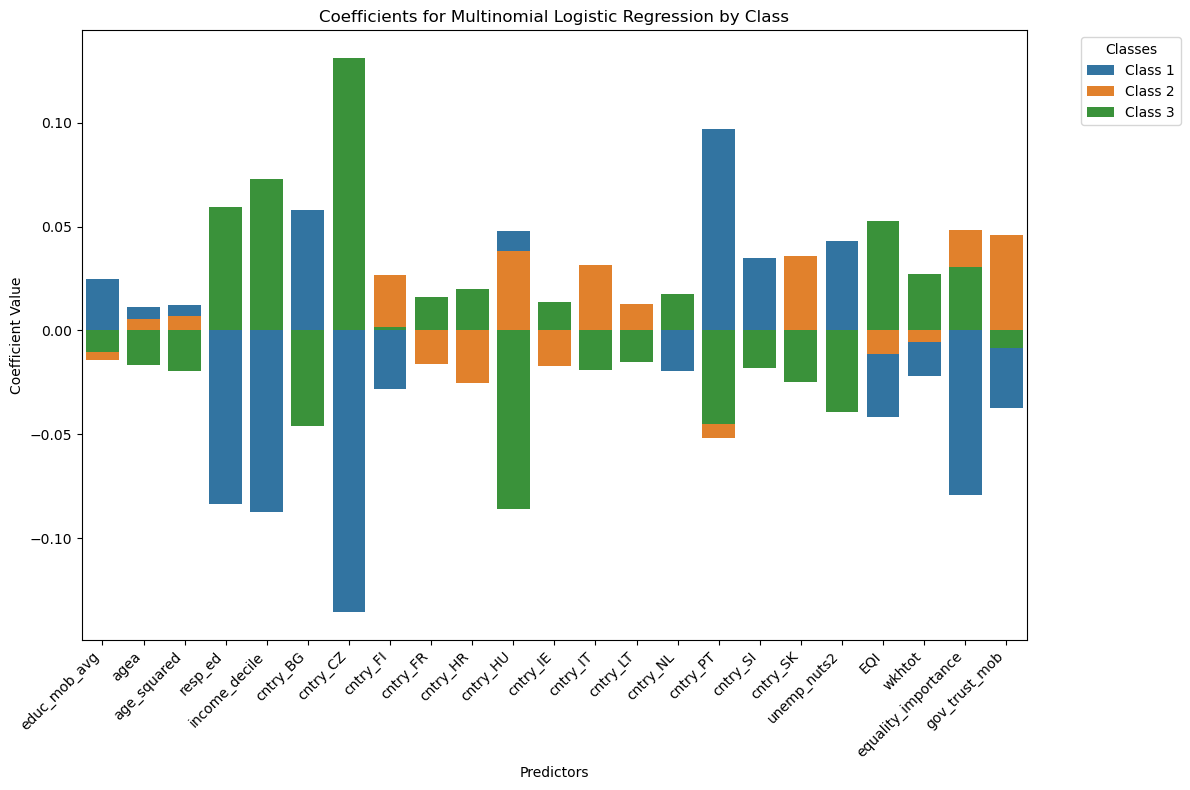

In [399]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ==============================
# Step 1: Load Dataset
# ==============================
data_path = "cleaned_combined_data_1.csv"
combined_data = pd.read_csv(data_path)

# ==============================
# Step 2: Create Age-Squared Variable
# ==============================
combined_data['age_squared'] = combined_data['agea'] ** 2

# ==============================
# Step 3: Transform Country (cntry) Variable
# ==============================
# One-hot encode the cntry (country) variable
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Use sparse_output=False instead of sparse=True
encoded_countries = encoder.fit_transform(combined_data[['cntry']])
encoded_country_df = pd.DataFrame(
    encoded_countries, columns=encoder.get_feature_names_out(['cntry'])
)

# Combine the encoded columns back into the dataset
combined_data = pd.concat([combined_data.reset_index(drop=True), encoded_country_df], axis=1)

# Drop the original 'cntry' column
combined_data.drop(columns=['cntry'], inplace=True)

# ==============================
# Step 4: Handle Missing Values
# ==============================
# Fill missing values for continuous variables with the median
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

# Fill missing values for categorical variables with the mode
categorical_vars = ["unemp_nuts2", "EQI", "resp_ed", "income_decile", "equality_importance"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# Handle missing values for interaction terms
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['gov_trust_mob'].fillna(0, inplace=True)  # Replace NaN in interaction terms with 0, assuming no interaction when missing

# ==============================
# Step 5: Define Variables
# ==============================
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
control_vars = ["agea", "age_squared", "resp_ed", "income_decile"] + list(encoded_country_df.columns)  # Include country controls
regional_factors = ["unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]
social_attitudes = ["equality_importance"]
interaction_terms = ["gov_trust_mob"]

# Combine selected predictors
selected_predictors = main_predictor + control_vars + regional_factors + hours_worked + social_attitudes + interaction_terms

# ==============================
# Step 6: Define Helper Function for Multinomial Logistic Regression
# ==============================
def run_multinomial_logit_with_weights(data, predictors, spec_name, regularization=1.0):
    """
    Train and evaluate a multinomial logistic regression model with class weighting.
    """
    print(f"\n--- Running Multinomial Logistic Regression (Spec: {spec_name}) ---")
    
    # Drop rows with missing values in dependent variable or predictors
    data = data.dropna(subset=[dependent_var] + predictors)
    
    # Prepare X and y
    X = data[predictors]
    y = data[dependent_var]
    
    # Scale continuous variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define class weights based on class imbalance
    class_weights = {cls: 1.0 / count for cls, count in y.value_counts().items()}
    
    # Train multinomial logistic regression with class weighting
    model = LogisticRegression(
        multi_class="multinomial", solver="lbfgs", C=regularization, max_iter=1000,
        class_weight=class_weights
    )
    model.fit(X_scaled, y)
    
    # Predict and evaluate
    predictions = model.predict(X_scaled)
    print(classification_report(y, predictions))
    
    # Return the trained model for coefficient analysis
    return model

# ==============================
# Step 7: Display Coefficients
# ==============================
def display_coefficients(model, predictors, spec_name):
    """
    Extract and display coefficients for each predictor in a multinomial logistic regression model.
    """
    print(f"\n--- Coefficients for {spec_name} ---\n")
    coef_df = pd.DataFrame(model.coef_, columns=predictors)
    coef_df.index = [f"Class {i + 1}" for i in range(model.coef_.shape[0])]
    print(coef_df)
    return coef_df

# ==============================
# Step 8: Train the Model with Selected Predictors
# ==============================
spec_name = "Top_Ten_Variables"
model = run_multinomial_logit_with_weights(combined_data, selected_predictors, spec_name)

# Display coefficients
coefficients = display_coefficients(model, selected_predictors, spec_name)

# ==============================
# Step 9: Plot Coefficients (Optional)
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize coefficients for each class
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(coefficients.index):
    sns.barplot(x=coefficients.columns, y=coefficients.loc[class_name], label=class_name)

plt.title("Coefficients for Multinomial Logistic Regression by Class")
plt.ylabel("Coefficient Value")
plt.xlabel("Predictors")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/197335508.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/197335508.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are


--- Running Multinomial Logistic Regression (Spec: Top_Ten_Variables) ---
              precision    recall  f1-score   support

           1       0.83      0.57      0.68     14610
           2       0.20      0.21      0.20      2920
           3       0.18      0.54      0.27      2102

    accuracy                           0.51     19632
   macro avg       0.40      0.44      0.38     19632
weighted avg       0.67      0.51      0.56     19632


--- Coefficients for Top_Ten_Variables ---

         educ_mob_avg      agea  age_squared   resp_ed  income_decile  \
Class 1      0.040099  0.013228     0.015474 -0.095349      -0.088071   
Class 2     -0.014962  0.006252     0.007335  0.024788       0.015094   
Class 3     -0.025137 -0.019480    -0.022809  0.070561       0.072977   

         unemp_nuts2       EQI    wkhtot  equality_importance  gov_trust_mob  
Class 1     0.083979 -0.049910 -0.023020            -0.085234      -0.044492  
Class 2    -0.000160 -0.008503 -0.006502        

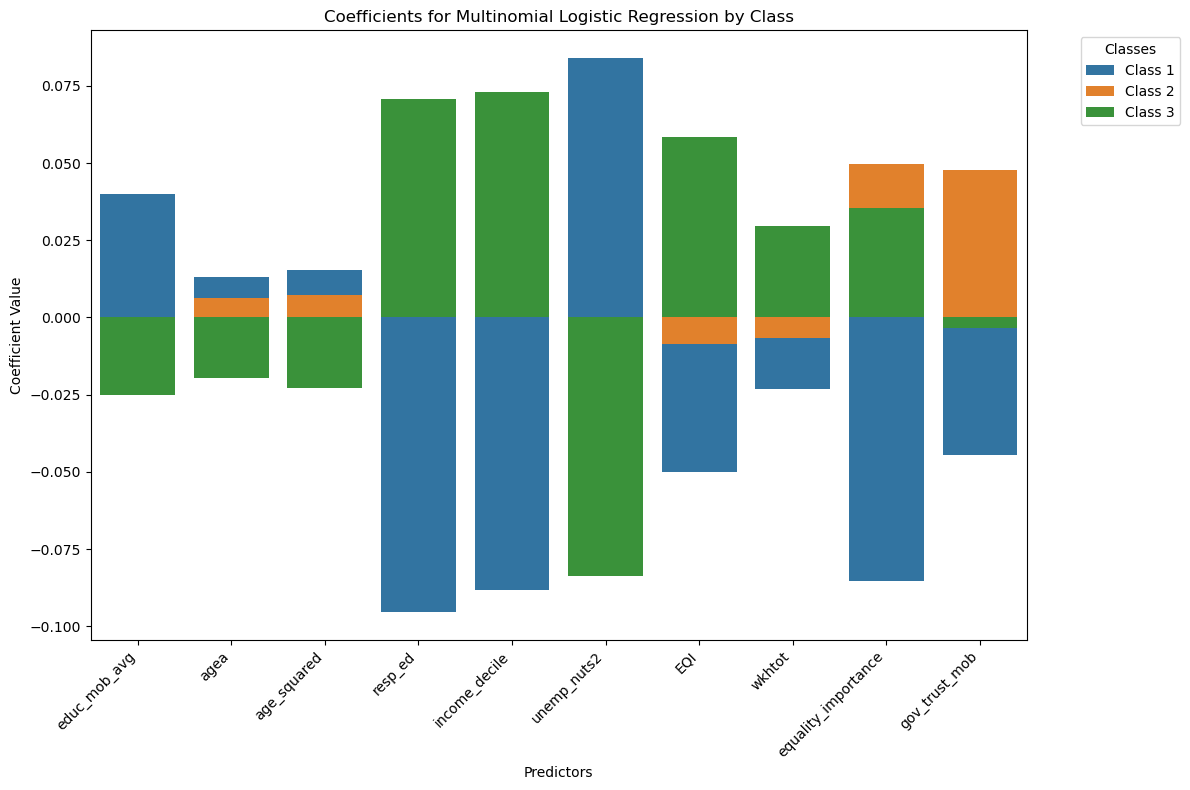

In [419]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ==============================
# Step 1: Load Dataset
# ==============================
data_path = "cleaned_combined_data_1.csv"
combined_data = pd.read_csv(data_path)

# ==============================
# Step 2: Create Age-Squared Variable
# ==============================
combined_data['age_squared'] = combined_data['agea'] ** 2

# ==============================
# Step 4: Handle Missing Values
# ==============================
# Fill missing values for continuous variables with the median
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

# Fill missing values for categorical variables with the mode
categorical_vars = ["unemp_nuts2", "EQI", "resp_ed", "income_decile", "equality_importance"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# Handle missing values for interaction terms
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['gov_trust_mob'].fillna(0, inplace=True)  # Replace NaN in interaction terms with 0, assuming no interaction when missing

# ==============================
# Step 5: Define Variables
# ==============================
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
control_vars = ["agea", "age_squared", "resp_ed", "income_decile"]
regional_factors = ["unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]
social_attitudes = ["equality_importance"]
interaction_terms = ["gov_trust_mob"]

# Combine selected predictors
selected_predictors = main_predictor + control_vars + regional_factors + hours_worked + social_attitudes + interaction_terms

# ==============================
# Step 6: Define Helper Function for Multinomial Logistic Regression
# ==============================
def run_multinomial_logit_with_weights(data, predictors, spec_name, regularization=1.0):
    """
    Train and evaluate a multinomial logistic regression model with class weighting.
    """
    print(f"\n--- Running Multinomial Logistic Regression (Spec: {spec_name}) ---")
    
    # Drop rows with missing values in dependent variable or predictors
    data = data.dropna(subset=[dependent_var] + predictors)
    
    # Prepare X and y
    X = data[predictors]
    y = data[dependent_var]
    
    # Scale continuous variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define class weights based on class imbalance
    class_weights = {cls: 1.0 / count for cls, count in y.value_counts().items()}
    
    # Train multinomial logistic regression with class weighting
    model = LogisticRegression(
        multi_class="multinomial", solver="lbfgs", C=regularization, max_iter=1000,
        class_weight=class_weights
    )
    model.fit(X_scaled, y)
    
    # Predict and evaluate
    predictions = model.predict(X_scaled)
    print(classification_report(y, predictions))
    
    # Return the trained model for coefficient analysis
    return model

# ==============================
# Step 7: Display Coefficients
# ==============================
def display_coefficients(model, predictors, spec_name):
    """
    Extract and display coefficients for each predictor in a multinomial logistic regression model.
    """
    print(f"\n--- Coefficients for {spec_name} ---\n")
    coef_df = pd.DataFrame(model.coef_, columns=predictors)
    coef_df.index = [f"Class {i + 1}" for i in range(model.coef_.shape[0])]
    print(coef_df)
    return coef_df

# ==============================
# Step 8: Train the Model with Selected Predictors
# ==============================
spec_name = "Top_Ten_Variables"
model = run_multinomial_logit_with_weights(combined_data, selected_predictors, spec_name)

# Display coefficients
coefficients = display_coefficients(model, selected_predictors, spec_name)

# ==============================
# Step 9: Plot Coefficients (Optional)
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize coefficients for each class
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(coefficients.index):
    sns.barplot(x=coefficients.columns, y=coefficients.loc[class_name], label=class_name)

plt.title("Coefficients for Multinomial Logistic Regression by Class")
plt.ylabel("Coefficient Value")
plt.xlabel("Predictors")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



--- Performing Cross-Validation ---

--- Fold 1 Classification Report ---
              precision    recall  f1-score   support

           1       0.83      0.57      0.68      2922
           2       0.22      0.24      0.23       584
           3       0.18      0.54      0.27       421

    accuracy                           0.52      3927
   macro avg       0.41      0.45      0.39      3927
weighted avg       0.67      0.52      0.57      3927


--- Fold 2 Classification Report ---
              precision    recall  f1-score   support

           1       0.82      0.57      0.67      2922
           2       0.20      0.20      0.20       584
           3       0.18      0.56      0.27       421

    accuracy                           0.51      3927
   macro avg       0.40      0.44      0.38      3927
weighted avg       0.66      0.51      0.56      3927


--- Fold 3 Classification Report ---
              precision    recall  f1-score   support

           1       0.83      0.5

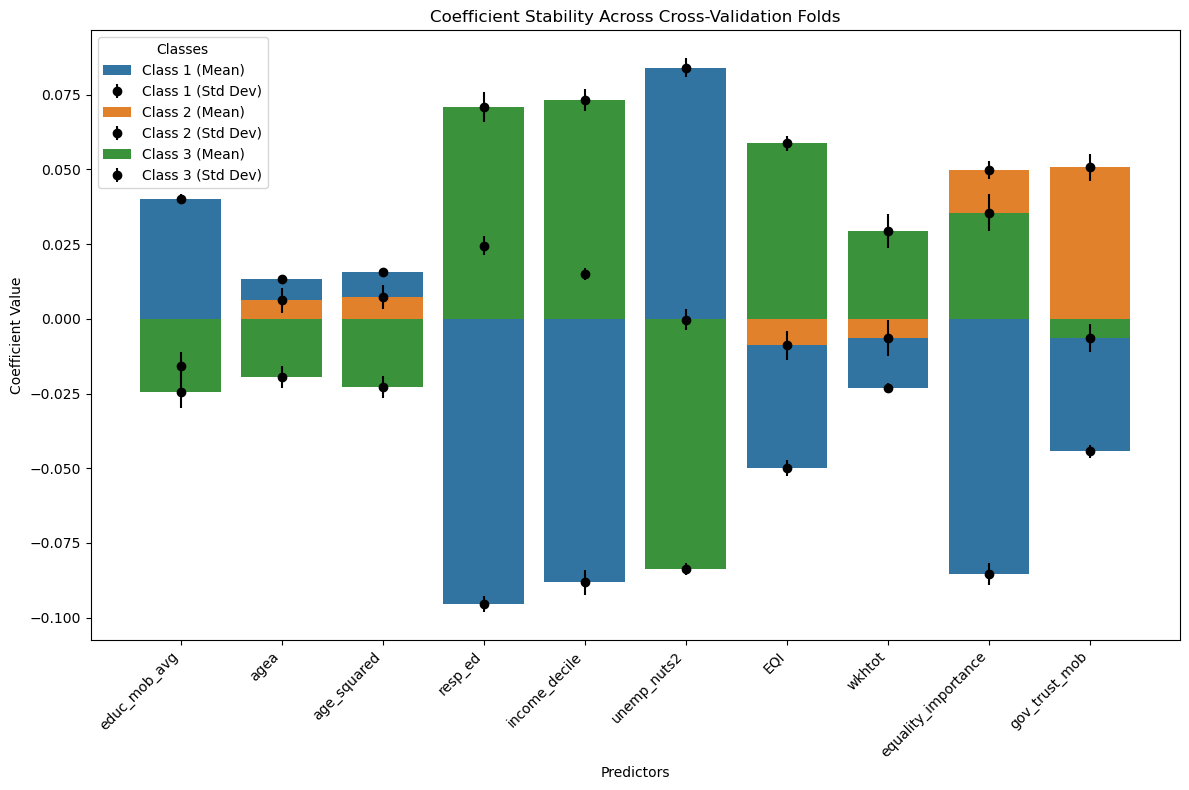

In [415]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# ==============================
# Step 10: Cross-Validation for Coefficient Stability
# ==============================

def cross_validate_coefficients(data, predictors, dependent_var, n_splits=5, regularization=1.0):
    """
    Perform cross-validation to assess coefficient stability in a multinomial logistic regression model.
    """
    print("\n--- Performing Cross-Validation ---")
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    coefficients = []
    scaler = StandardScaler()
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(data[predictors], data[dependent_var])):
        # Split data
        train_data, test_data = data.iloc[train_idx], data.iloc[test_idx]
        
        # Prepare X and y
        X_train, y_train = train_data[predictors], train_data[dependent_var]
        X_test, y_test = test_data[predictors], test_data[dependent_var]
        
        # Scale continuous variables
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Define class weights based on class imbalance
        class_weights = {cls: 1.0 / count for cls, count in y_train.value_counts().items()}
        
        # Train multinomial logistic regression with class weighting
        model = LogisticRegression(
            multi_class="multinomial", solver="lbfgs", C=regularization, max_iter=1000,
            class_weight=class_weights
        )
        model.fit(X_train_scaled, y_train)
        
        # Save coefficients
        coef_df = pd.DataFrame(model.coef_, columns=predictors)
        coef_df.index = [f"Class {i + 1}" for i in range(model.coef_.shape[0])]
        coefficients.append(coef_df)
        
        # Evaluate on test set
        predictions = model.predict(X_test_scaled)
        print(f"\n--- Fold {fold + 1} Classification Report ---")
        print(classification_report(y_test, predictions))
    
    return coefficients

# Perform cross-validation
cv_coefficients = cross_validate_coefficients(combined_data, selected_predictors, dependent_var)

# ==============================
# Step 11: Analyze Coefficient Stability
# ==============================
# Combine coefficients from all folds
combined_coefs = pd.concat(cv_coefficients, keys=[f"Fold {i+1}" for i in range(len(cv_coefficients))])

# Calculate mean and standard deviation of coefficients across folds
mean_coefs = combined_coefs.groupby(level=1).mean()
std_coefs = combined_coefs.groupby(level=1).std()

# Display results
print("\n--- Mean Coefficients Across Folds ---")
print(mean_coefs)

print("\n--- Standard Deviation of Coefficients Across Folds ---")
print(std_coefs)

# ==============================
# Step 12: Visualize Coefficient Stability
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for class_name in mean_coefs.index:
    sns.barplot(x=mean_coefs.columns, y=mean_coefs.loc[class_name], label=f"{class_name} (Mean)")
    plt.errorbar(
        x=range(len(mean_coefs.columns)),
        y=mean_coefs.loc[class_name],
        yerr=std_coefs.loc[class_name],
        fmt="o", color="black", label=f"{class_name} (Std Dev)"
    )

plt.title("Coefficient Stability Across Cross-Validation Folds")
plt.ylabel("Coefficient Value")
plt.xlabel("Predictors")
plt.xticks(ticks=range(len(mean_coefs.columns)), labels=mean_coefs.columns, rotation=45, ha="right")
plt.legend(title="Classes")
plt.tight_layout()
plt.show()


In [417]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ==============================
# Step 1: Load Dataset
# ==============================
data_path = "cleaned_combined_data_1.csv"
combined_data = pd.read_csv(data_path)

# ==============================
# Step 2: Create Age-Squared Variable
# ==============================
combined_data['age_squared'] = combined_data['agea'] ** 2

# ==============================
# Step 3: Transform Country (cntry) Variable
# ==============================
# One-hot encode the cntry (country) variable
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_countries = encoder.fit_transform(combined_data[['cntry']])
encoded_country_df = pd.DataFrame(
    encoded_countries, columns=encoder.get_feature_names_out(['cntry'])
)

# Combine the encoded columns back into the dataset
combined_data = pd.concat([combined_data.reset_index(drop=True), encoded_country_df], axis=1)

# Drop the original 'cntry' column
combined_data.drop(columns=['cntry'], inplace=True)

# ==============================
# Step 4: Handle Missing Values
# ==============================
# Fill missing values for continuous variables with the median
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

# Fill missing values for categorical variables with the mode
categorical_vars = ["unemp_nuts2", "EQI", "resp_ed", "income_decile", "equality_importance"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# Handle missing values for interaction terms
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['gov_trust_mob'].fillna(0, inplace=True)

# ==============================
# Step 5: Define Variables
# ==============================
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
control_vars = ["agea", "age_squared", "resp_ed", "income_decile"]
regional_factors = ["unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]
social_attitudes = ["equality_importance"]
interaction_terms = ["gov_trust_mob"]

# Combine selected predictors
selected_predictors = main_predictor + control_vars + regional_factors + hours_worked + social_attitudes + interaction_terms

# ==============================
# Step 6: Define Helper Function for Logistic Regression
# ==============================
def run_logistic_regression_with_weights(data, predictors, spec_name, regularization=1.0):
    """
    Train and evaluate a logistic regression model with class weighting.
    """
    print(f"\n--- Running Logistic Regression (Spec: {spec_name}) ---")
    
    # Drop rows with missing values in dependent variable or predictors
    data = data.dropna(subset=[dependent_var] + predictors)
    
    # Prepare X and y
    X = data[predictors]
    y = data[dependent_var]
    
    # Scale continuous variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define class weights based on class imbalance
    class_weights = {cls: 1.0 / count for cls, count in y.value_counts().items()}
    
    # Train logistic regression with class weighting
    model = LogisticRegression(
        solver="lbfgs", C=regularization, max_iter=1000,
        class_weight=class_weights
    )
    model.fit(X_scaled, y)
    
    # Predict and evaluate
    predictions = model.predict(X_scaled)
    print(classification_report(y, predictions))
    
    # Return the trained model for coefficient analysis
    return model

# ==============================
# Step 7: Display Coefficients
# ==============================
def display_coefficients(model, predictors, spec_name):
    """
    Extract and display coefficients for a logistic regression model.
    """
    print(f"\n--- Coefficients for {spec_name} ---\n")
    coef_df = pd.DataFrame(model.coef_, columns=predictors)
    coef_df.index = ["Logistic Regression Coefficients"]
    print(coef_df)
    return coef_df

# ==============================
# Step 8: Train the Model with Selected Predictors
# ==============================
spec_name = "Top_Ten_Variables"
model = run_logistic_regression_with_weights(combined_data, selected_predictors, spec_name)

# Display coefficients
coefficients = display_coefficients(model, selected_predictors, spec_name)

# ==============================
# Step 9: Plot Coefficients (Optional)
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients.columns, y=coefficients.iloc[0], color="blue")

plt.title("Coefficients for Logistic Regression")
plt.ylabel("Coefficient Value")
plt.xlabel("Predictors")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



--- Running Logistic Regression (Spec: Top_Ten_Variables) ---
              precision    recall  f1-score   support

           1       0.83      0.57      0.68     14610
           2       0.20      0.21      0.20      2920
           3       0.18      0.54      0.27      2102

    accuracy                           0.51     19632
   macro avg       0.40      0.44      0.38     19632
weighted avg       0.67      0.51      0.56     19632


--- Coefficients for Top_Ten_Variables ---



/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3488033325.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/3488033325.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

In [407]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [413]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load dataset
data_path = "cleaned_combined_data_1.csv"  # Replace with actual file path
combined_data = pd.read_csv(data_path)

# Create age-squared variable
combined_data['age_squared'] = combined_data['agea'] ** 2

# Add interaction terms for social attitudes and mobility
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']

# ==============================
# Handle Missing Values
# ==============================
# Drop rows where critical variables are missing
critical_vars = ["educ_mob_categ"]  # Dependent and main predictor
combined_data = combined_data.dropna(subset=critical_vars)

# Handle continuous variables
continuous_vars = ["agea", "age_squared", "wkhtot"]
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

# Handle categorical variables
categorical_vars = ["gender", "resp_ed", "income_decile", "child_ever", "marital_status", 
                    "unemp_ever", "union_member", "domicile", "unemp_nuts2", "EQI", 
                    "gov_trust", "equality_importance"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# Handle interaction terms
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['gov_trust_mob'].fillna(0, inplace=True)

combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']
combined_data['equality_mob'].fillna(0, inplace=True)


# Define variables
dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
main_predictor_cat = ["educ_mob_categ"]
control_vars = ["agea", "age_squared", "gender", "resp_ed", "income_decile",
                "child_ever", "marital_status", "unemp_ever", "union_member"]
regional_factors = ["domicile", "unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]
social_attitudes = ["gov_trust", "equality_importance"]
interaction_terms = ["gov_trust_mob", "equality_mob"]

# Combine all predictors
predictors = main_predictor + main_predictor_cat + control_vars + regional_factors + hours_worked + social_attitudes + interaction_terms

# Add a constant term for VIF calculation
X = combined_data[predictors]  # Replace 'predictors' with your variable list
X = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/4098087762.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_15410/4098087762.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

               Variable         VIF
0                 const  379.755991
1          educ_mob_avg   12.871874
2        educ_mob_categ    1.611888
3                  agea   49.104323
4           age_squared   49.137459
5                gender    1.062684
6               resp_ed    2.042077
7         income_decile    1.374156
8            child_ever    1.170785
9        marital_status    1.314725
10           unemp_ever    1.085379
11         union_member    1.087349
12             domicile    1.096522
13          unemp_nuts2    1.041308
14                  EQI    1.243393
15               wkhtot    1.039340
16            gov_trust   22.014432
17  equality_importance   21.501445
18        gov_trust_mob   27.533982
19         equality_mob   26.514445
